In [13]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.append("C:/Users/admin/Desktop/JuliaDQMC/code/")
from DP_Lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def powerfit_F(x,y):
    initial_guess = [ 1.0, 1.0]

    def model_func(x, b, c):
        return  b * x**(c)
    
    params, _ = curve_fit(
        model_func, x, y,
        p0=initial_guess,
        # bounds=None,
        maxfev=100000
    )
    return params

In [15]:
folder_paths = "./"
L=[]
mu=[]
sigma=[]
EE=[]
dEE=[]

for count, file in enumerate(os.listdir(folder_paths)):
    if not file.endswith(".csv") or "EEicr" not in file:
        continue
    print(file)

    full_path = os.path.join(folder_paths, file)
    params = extract_numbers(file)
    L.append(params[3])

    data = []
    with open(full_path, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            data.append(row)

    data=combine_data(data)
    print(data.shape)
    EE.append( -np.log(np.mean(data[:,1:])) )
    dEE.append( np.std(data[:,1:]) / ( np.sqrt(data.shape[1]-1) / np.mean(data[:,1:]) ) )
    mu.append(np.mean(np.log( data[:,1:]), axis=1))
    sigma.append( np.std(np.log(data[:,1:]),axis=1,ddof=1)  )



SCEEicrHC120_t1.0U1.0size[12, 12]Δt0.05Θ1.0N1BS5.csv
(1, 321)
SCEEicrHC120_t1.0U1.0size[15, 15]Δt0.05Θ1.0N1BS5.csv
(1, 321)
SCEEicrHC120_t1.0U1.0size[3, 3]Δt0.05Θ1.0N1BS5.csv
(1, 481)
SCEEicrHC120_t1.0U1.0size[6, 6]Δt0.05Θ1.0N1BS5.csv
(1, 481)
SCEEicrHC120_t1.0U1.0size[9, 9]Δt0.05Θ1.0N1BS5.csv
(1, 321)


In [16]:
# EE=-np.log(mu).reshape(-1)
# dEE=(np.array(sigma)/np.array(mu)).reshape(-1)
idx=np.argsort(L)
L=np.array(L).reshape(-1)[idx]  
mu=np.array(mu).reshape(-1)[idx]
sigma=np.array(sigma).reshape(-1)[idx]
EE=np.array(EE).reshape(-1)[idx]
dEE=np.array(dEE).reshape(-1)[idx]

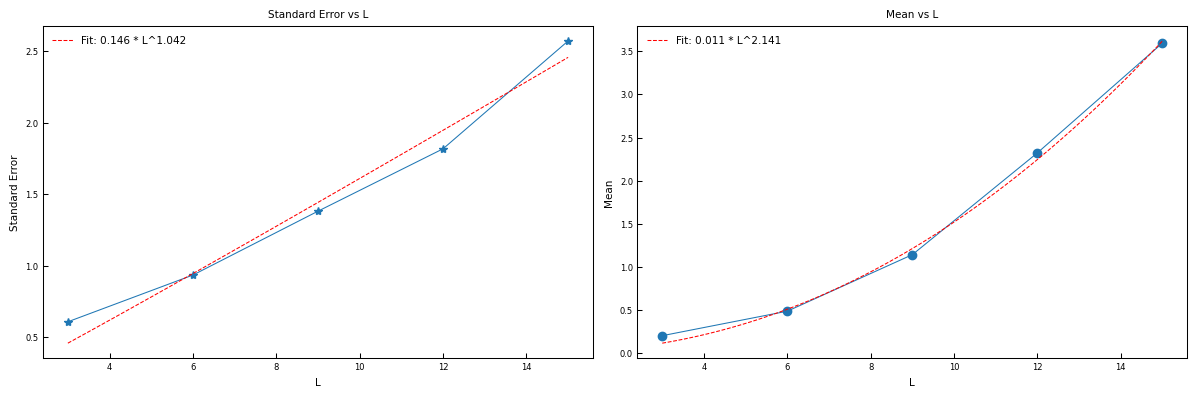

In [17]:
x=np.linspace(min(L),max(L),100)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(L,sigma,"*-")
params=powerfit_F(L,sigma)
y=params[0] * x**(params[1])
plt.plot(x,y,"r--",label=f"Fit: {params[0]:.3f} * L^{params[1]:.3f}")
plt.legend()
plt.xlabel("L")
plt.ylabel("Standard Error")
plt.title("Standard Error vs L")

plt.subplot(1,2,2)
plt.plot(L,-mu,"o-")
params=powerfit_F(L,np.abs(mu))
y=params[0] * x**(params[1])
plt.plot(x,y,"r--",label=f"Fit: {params[0]:.3f} * L^{params[1]:.3f}")
plt.legend()
plt.xlabel("L")
plt.ylabel("Mean")
plt.title("Mean vs L")
plt.tight_layout()
plt.show()

In [18]:
print("L=",L)
print((0.5*L**1.35))
print((0.1*L**2))
print(np.ceil(0.426+0.001*L**2.441))

L= [ 3.  6.  9. 12. 15.]
[ 2.20335106  5.61660901  9.70951176 14.31741741 19.35054513]
[ 0.9  3.6  8.1 14.4 22.5]
[1. 1. 1. 1. 2.]


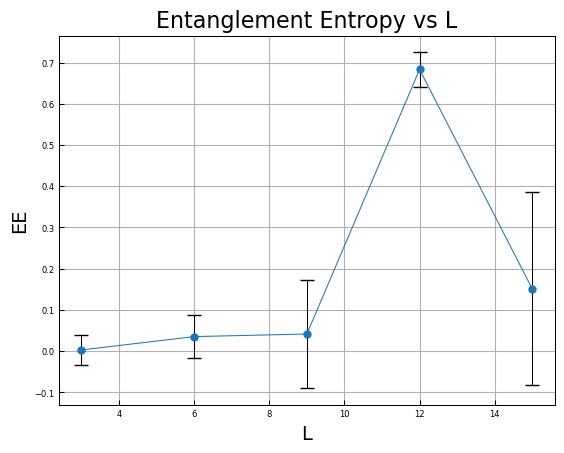

In [19]:
plt.errorbar(L, EE, yerr=dEE, fmt='o-',  markersize=5, capsize=5, ecolor='black',)
plt.xlabel('L', fontsize=14)
plt.ylabel('EE', fontsize=14)
plt.title('Entanglement Entropy vs L', fontsize=16)
plt.grid(True)
plt.show()

In [20]:
full_path = os.path.join(folder_paths, "SCEEicrHC120_t1.0U1.0size[9, 9]Δt0.05Θ1.0N1BS5.csv")
params = extract_numbers(file)

data = []
with open(full_path, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)

data=combine_data(data)

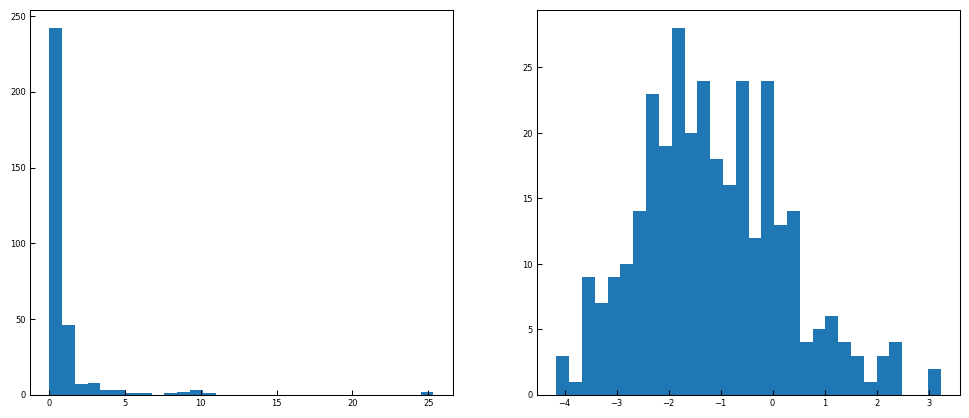

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(data[0,1:],bins= 30)
plt.subplot(1,2,2)
plt.hist(np.log(data[0,1:]),bins= 30)

plt.show()